## **Task 1A - Exploratory Data Analysis**

In [1]:
import pandas as pd

df = pd.read_csv("comma-separated values.csv")

print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns)
print("\nData types:\n", df.dtypes)
print("\nFirst few rows:\n", df.head())
print("\nMissing values per column:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe(include='all'))

df_raw = df.copy()

Shape of dataset: (376912, 5)

Column names: Index(['Unnamed: 0', 'id', 'time', 'variable', 'value'], dtype='object')

Data types:
 Unnamed: 0      int64
id             object
time           object
variable       object
value         float64
dtype: object

First few rows:
    Unnamed: 0       id                     time variable  value
0           1  AS14.01  2014-02-26 13:00:00.000     mood    6.0
1           2  AS14.01  2014-02-26 15:00:00.000     mood    6.0
2           3  AS14.01  2014-02-26 18:00:00.000     mood    6.0
3           4  AS14.01  2014-02-26 21:00:00.000     mood    7.0
4           5  AS14.01  2014-02-27 09:00:00.000     mood    6.0

Missing values per column:
 Unnamed: 0      0
id              0
time            0
variable        0
value         202
dtype: int64

Summary statistics:
           Unnamed: 0       id                     time variable          value
count   3.769120e+05   376912                   376912   376912  376710.000000
unique           NaN       27 

In [2]:
print("\nUnique 'variable' values:\n", df['variable'].unique())

numeric_vars = df[df['variable'].isin(['mood', 'activity', 'screen'])].copy()
numeric_vars['value'] = pd.to_numeric(numeric_vars['value'], errors='coerce')

print("\nStats per variable:\n", numeric_vars.groupby('variable')['value'].describe())


Unique 'variable' values:
 ['mood' 'circumplex.arousal' 'circumplex.valence' 'activity' 'screen'
 'call' 'sms' 'appCat.builtin' 'appCat.communication'
 'appCat.entertainment' 'appCat.finance' 'appCat.game' 'appCat.office'
 'appCat.other' 'appCat.social' 'appCat.travel' 'appCat.unknown'
 'appCat.utilities' 'appCat.weather']

Stats per variable:
             count       mean         std    min      25%        50%  \
variable                                                              
activity  22965.0   0.115958    0.186946  0.000  0.00000   0.021739   
mood       5641.0   6.992555    1.032769  1.000  7.00000   7.000000   
screen    96578.0  75.335206  253.822497  0.035  5.32225  20.044500   

                75%       max  
variable                       
activity   0.158333     1.000  
mood       8.000000    10.000  
screen    62.540250  9867.007  


**Analysis of the dataset**

- Rows: 376.912 in total records

- Columns: 5 columns: id, time, variable, value, plus an index

- Users: 27 unique users ids

- Variables: 19 unique sensor types and self-reported data types

- Missing values: 202 values

**What stands out**

- Mood appears far less frequently than screen or activity

- Call and sms may be binary features, less usefull

- Extreme outliers are present in screen data

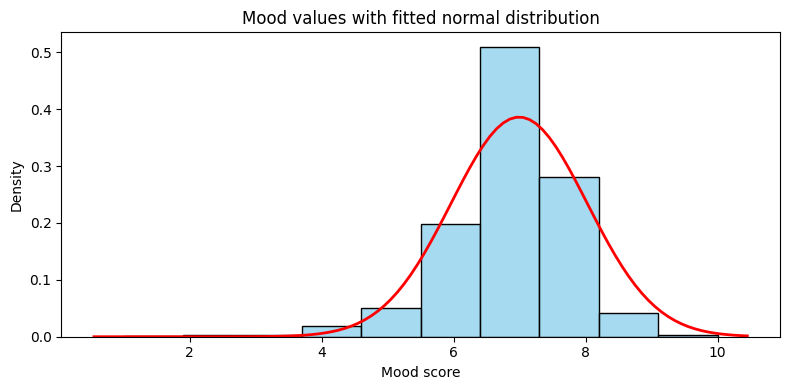

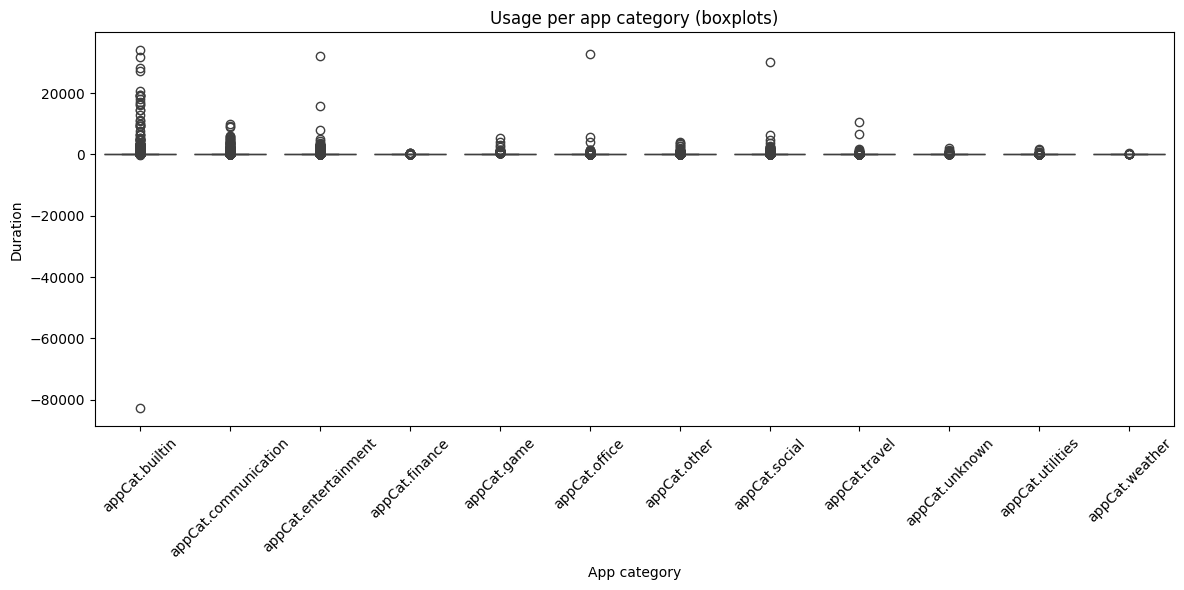

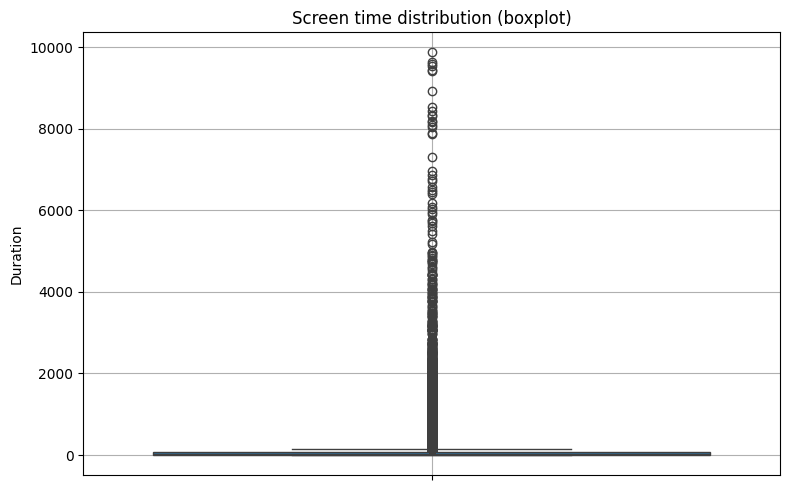

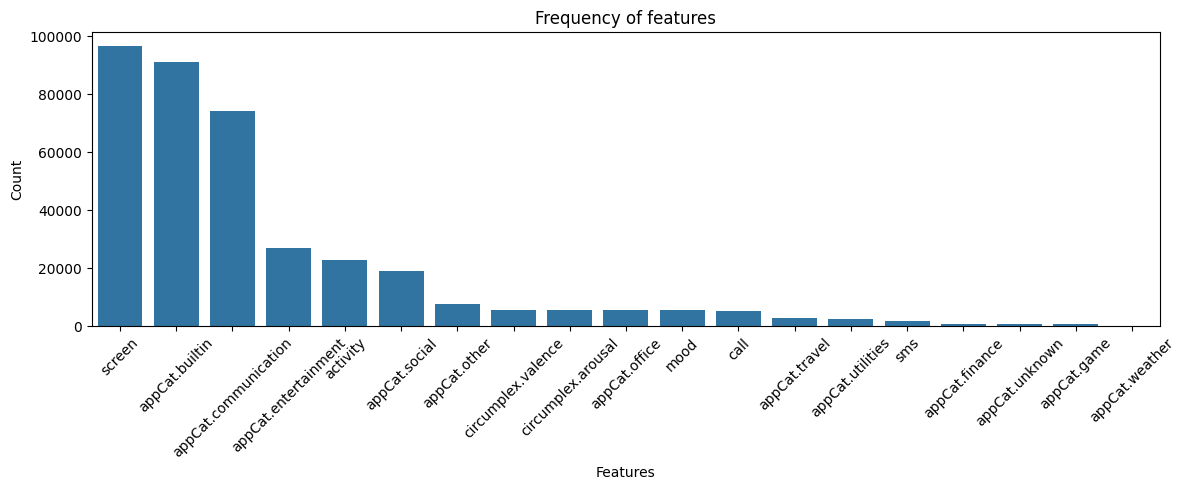

Summary Statistics per Variable:
                        count        mean         std        min       25%  \
variable                                                                     
activity              22965.0    0.115958    0.186946      0.000   0.00000   
appCat.builtin        91288.0   18.538262  415.989243 -82798.871   2.02000   
appCat.communication  74276.0   43.343792  128.912750      0.006   5.21800   
appCat.entertainment  27125.0   37.576480  262.960476     -0.011   1.33400   
appCat.finance          939.0   21.755251   39.218361      0.131   4.07200   
appCat.game             813.0  128.391615  327.145246      1.003  14.14800   
appCat.office          5642.0   22.578892  449.601382      0.003   2.00400   
appCat.other           7650.0   25.810839  112.781355      0.014   7.01900   
appCat.social         19145.0   72.401906  261.551846      0.094   9.03000   
appCat.travel          2846.0   45.730850  246.109307      0.080   5.08650   
appCat.unknown          939.0  

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Mood distribution
mood_df = df[df['variable'] == 'mood'].copy()
mood_df['value'] = pd.to_numeric(mood_df['value'], errors='coerce')
mood_values = mood_df['value'].dropna()

mean = mood_values.mean()
std = mood_values.std()

plt.figure(figsize=(8, 4))
sns.histplot(mood_values, bins=10, stat='density', color='skyblue', edgecolor='black')
xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r', linewidth=2)

plt.title("Mood values with fitted normal distribution")
plt.xlabel("Mood score")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

# Boxplot per app categories
app_cats = df[df['variable'].str.startswith('appCat.')].copy()
app_cats['value'] = pd.to_numeric(app_cats['value'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.boxplot(data=app_cats, x='variable', y='value')
plt.xticks(rotation=45)
plt.title("Usage per app category (boxplots)")
plt.ylabel("Duration")
plt.xlabel("App category")
plt.tight_layout()
plt.show()

mood_df = df[df["variable"] == "mood"]
screen_df = df[df["variable"] == "screen"]
appcat_df = df[df["variable"].str.startswith("appCat.")]

# Boxplot for screen time
plt.figure(figsize=(8, 5))
sns.boxplot(y=screen_df["value"])
plt.title("Screen time distribution (boxplot)")
plt.ylabel("Duration")
plt.grid(True)
plt.tight_layout()
plt.show()

# Frequency of variables
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="variable", order=df["variable"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Frequency of features")
plt.ylabel("Count")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

# Statistics summary
summary_df = df.groupby("variable")["value"].describe()
print("Summary Statistics per Variable:")
print(summary_df)

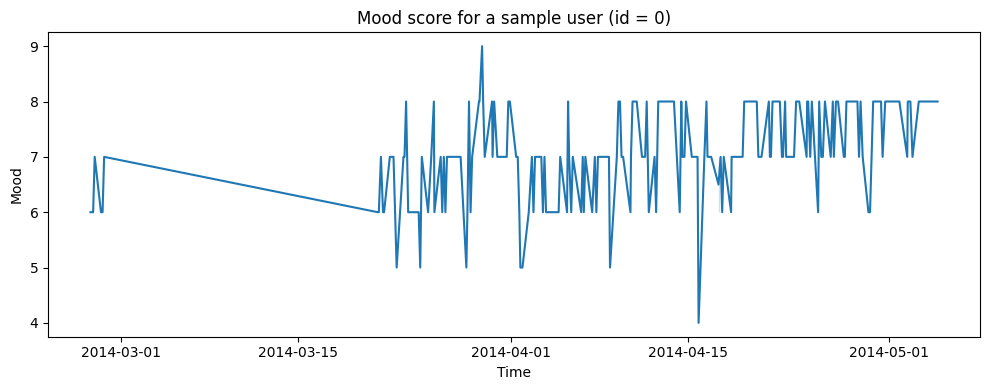

In [4]:
user_example = df[df['id'] == df['id'].unique()[0]]
mood_ts = user_example[user_example['variable'] == 'mood'].copy()
mood_ts['time'] = pd.to_datetime(mood_ts['time'])

plt.figure(figsize=(10, 4))
sns.lineplot(data=mood_ts, x='time', y='value')
plt.title("Mood score for a sample user (id = 0)")
plt.xlabel("Time")
plt.ylabel("Mood")
plt.tight_layout()
plt.show()


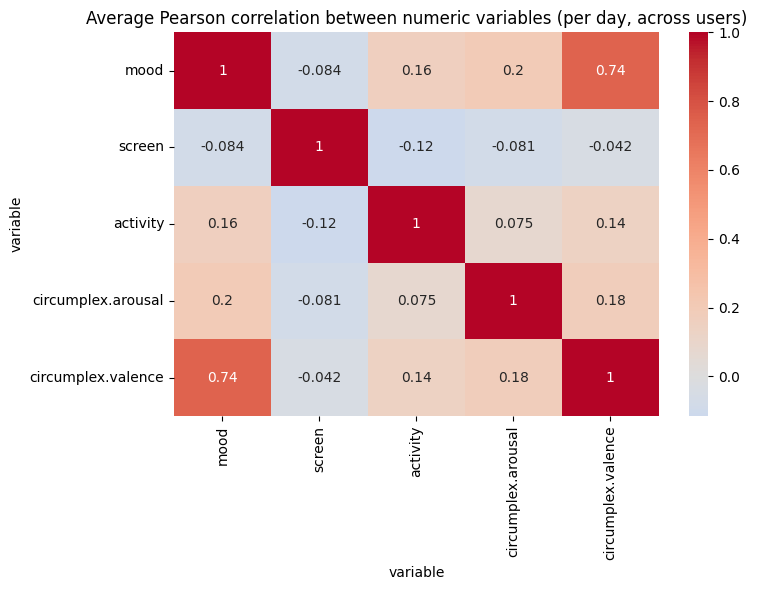

In [5]:
df['time'] = pd.to_datetime(df['time'])

# Filtering for numeric variables
numeric_vars = ['mood', 'screen', 'activity', 'circumplex.arousal', 'circumplex.valence']
df_numeric = df[df['variable'].isin(numeric_vars)].copy()
df_numeric['value'] = pd.to_numeric(df_numeric['value'], errors='coerce')
df_numeric['date'] = df_numeric['time'].dt.date # Grouping by date

pivoted = df_numeric.pivot_table(index=['id', 'time'], 
                                  columns='variable', 
                                  values='value').reset_index()

corrs = []

for user_id, group in pivoted.groupby('id'):
    daily = group.resample('1D', on='time').mean(numeric_only=True)
    
    if daily[numeric_vars].dropna().shape[0] >= 3:
        corr_matrix = daily[numeric_vars].corr(method='pearson')
        corrs.append(corr_matrix)

mean_corr = sum(corrs) / len(corrs)

plt.figure(figsize=(8, 6))
sns.heatmap(mean_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Average Pearson correlation between numeric variables (per day, across users)")
plt.tight_layout()
plt.show()


In [6]:
user_times = df.groupby("id")["time"].agg(['min', 'max'])
user_times['days_covered'] = (user_times['max'] - user_times['min']).dt.days
print("Time coverage per user:")
print(user_times.describe())

Time coverage per user:
                                 min                            max  \
count                             27                             27   
mean   2014-02-20 14:08:55.257740544  2014-05-10 08:14:25.584370432   
min       2014-02-17 07:00:52.197000            2014-04-25 21:00:00   
25%    2014-02-17 09:55:30.920500224            2014-05-05 15:00:00   
50%    2014-02-17 12:51:38.028999936            2014-05-05 18:00:00   
75%    2014-02-17 18:37:19.363000064            2014-05-11 17:00:00   
max       2014-04-09 10:47:41.782000            2014-06-09 00:00:00   
std                              NaN                            NaN   

       days_covered  
count     27.000000  
mean      78.370370  
min       48.000000  
25%       76.000000  
50%       77.000000  
75%       80.000000  
max      102.000000  
std       10.492298  


## **Task 1B - Data Cleaning**

#### **Interquartile Range (IQR) Method**

**We utilized the IQR method** to **remove outliers**.

**Why IQR?**

• Unlike z-score, which presumes normality, it is robust to skewed data.

• Performs well with usage characteristics that have long tails, such as app durations and screen time.

• Recommended by multiple data mining sources, e.g. Che et al., 2018: “Recurrent Neural Networks for Multivariate Time Series with Missing Values”

In [7]:
def remove_outliers_iqr(df, group_col='variable', value_col='value'):
    cleaned_df = pd.DataFrame()
    dropped_counts = {}
    for var, group in df.groupby(group_col):
        q1 = group[value_col].quantile(0.25)
        q3 = group[value_col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        filtered = group[(group[value_col] >= lower) & (group[value_col] <= upper)]
        cleaned_df = pd.concat([cleaned_df, filtered])
        dropped_counts[var] = len(group) - len(filtered)
    return cleaned_df, dropped_counts

df_cleaned, dropped_counts = remove_outliers_iqr(df)

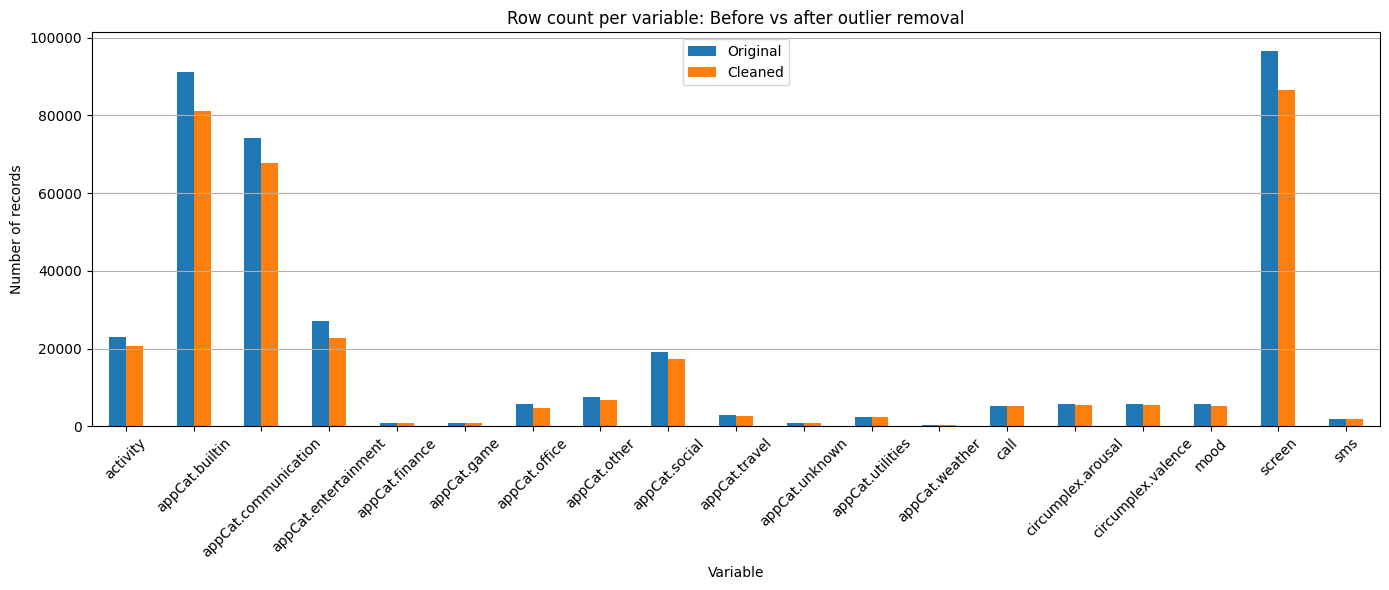

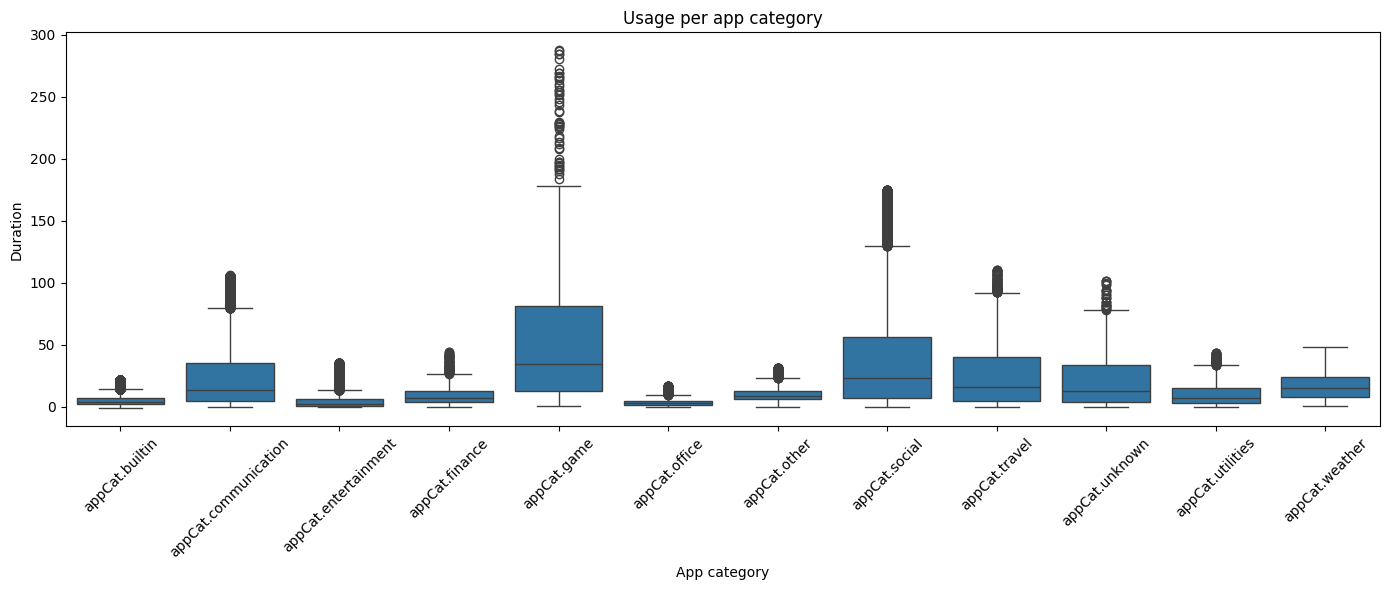

In [8]:
original_counts = df["variable"].value_counts().sort_index()
cleaned_counts = df_cleaned["variable"].value_counts().sort_index()

comparison_df = pd.DataFrame({
    "Original": original_counts,
    "Cleaned": cleaned_counts
})

comparison_df.plot(kind="bar", figsize=(14, 6))
plt.title("Row count per variable: Before vs after outlier removal")
plt.ylabel("Number of records")
plt.xlabel("Variable")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

appcat_cleaned = df_cleaned[df_cleaned["variable"].str.startswith("appCat.")]
plt.figure(figsize=(14, 6))
sns.boxplot(data=appcat_cleaned, x="variable", y="value")
plt.xticks(rotation=45)
plt.title("Usage per app category")
plt.ylabel("Duration")
plt.xlabel("App category")
plt.tight_layout()
plt.show()

#### **Imputing missing values with a combination of Forward Fill and Rolling Window Mean**

In [9]:
missing_summary = df.groupby('variable')['value'].apply(lambda x: x.isna().mean() * 100).sort_values()
print("Missing % per variable:\n", missing_summary)

Missing % per variable:
 variable
activity                0.000000
mood                    0.000000
call                    0.000000
appCat.weather          0.000000
appCat.utilities        0.000000
appCat.unknown          0.000000
screen                  0.000000
appCat.social           0.000000
appCat.travel           0.000000
appCat.office           0.000000
appCat.game             0.000000
appCat.finance          0.000000
appCat.entertainment    0.000000
appCat.communication    0.000000
appCat.builtin          0.000000
appCat.other            0.000000
sms                     0.000000
circumplex.arousal      0.815169
circumplex.valence      2.764487
Name: value, dtype: float64


In [14]:
df['time'] = pd.to_datetime(df['time'])
df_sorted = df.sort_values(by=['id', 'time'])

# Using forward fill for all users and all their variables, except mood
df_ffilled = df_sorted.copy()
non_mood_mask = df_ffilled['variable'] != 'mood'
df_ffilled.loc[non_mood_mask, 'value'] = (
    df_ffilled[non_mood_mask]
    .groupby('id')['value']
    .transform(lambda x: x.fillna(method='ffill'))
)

# Applying rolling mean imputation to mood separately
mood_mask = df_ffilled['variable'] == 'mood'
df_ffilled.loc[mood_mask, 'value'] = (
    df_ffilled[mood_mask]
    .groupby('id')['value']
    .transform(lambda x: x.fillna(x.rolling(window=3, min_periods=1).mean()))
)

# Droping rows with long missing values in mood or screen (gaps over 1 day)
def drop_long_missing_gaps(df, core_vars=['mood', 'screen'], max_gap='1D'):
    cleaned = []
    for user_id, group in df.groupby('id'):
        group = group.sort_values('time')
        for var in core_vars:
            var_group = group[group['variable'] == var]
            time_diffs = var_group['time'].diff()
            long_gaps = var_group[time_diffs > pd.to_timedelta(max_gap)]
            if not long_gaps.empty:
                last_valid_time = long_gaps['time'].iloc[0]
                group = group[group['time'] <= last_valid_time]
        cleaned.append(group)
    return pd.concat(cleaned)

df_cleaned_final = drop_long_missing_gaps(df_ffilled)

Missing values after ffill/rolling: 0


/var/folders/28/mcr2nr352779wyhdbwcxhcth0000gn/T/ipykernel_94431/2641090844.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .transform(lambda x: x.fillna(method='ffill'))


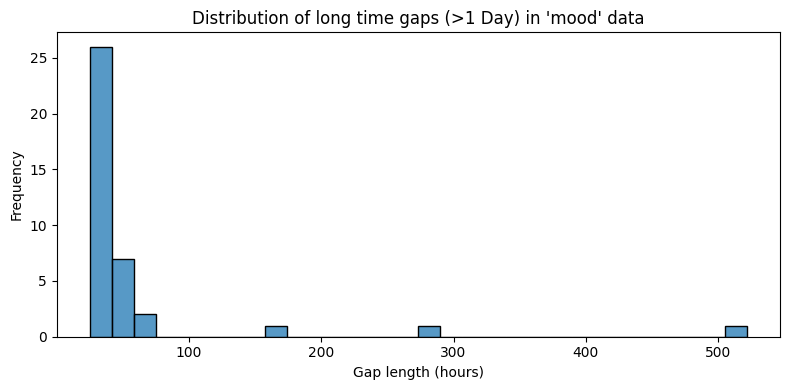

In [15]:
original_missing = df['value'].isna().sum()
after_ffill_missing = df_ffilled['value'].isna().sum()
activity_original_missing = df[df['variable'] == 'activity']['value'].isna().sum()
activity_after_rolling_missing = df_ffilled[df_ffilled['variable'] == 'activity']['value'].isna().sum()

def get_long_gaps(df, var='mood', max_gap='1D'):
    long_gap_durations = []
    for user_id, group in df[df['variable'] == var].groupby('id'):
        group = group.sort_values('time')
        time_diffs = group['time'].diff()
        long_gaps = time_diffs[time_diffs > pd.to_timedelta(max_gap)]
        long_gap_durations.extend(long_gaps.dt.total_seconds() / 3600)
    return long_gap_durations

long_gaps_hours = get_long_gaps(df_sorted, var='mood', max_gap='1D')

plt.figure(figsize=(8, 4))
sns.histplot(long_gaps_hours, bins=30)
plt.title("Distribution of long time gaps (>1 Day) in 'mood' data")
plt.xlabel("Gap length (hours)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [17]:
outliers_removed_total = sum(dropped_counts.values())
long_gap_removed_rows = df_ffilled.shape[0] - df_cleaned_final.shape[0]

summary_data = {
    "Step": [
        "Outlier Removal",
        "Missing Imputation",
        "Long Gap Removal"
    ],
    "Method": [
        "IQR per variable",
        "Forward Fill (all) + Rolling Mean (mood)",
        "Drop after 1-day gap in mood/screen"
    ],
    "Result": [
        f"Removed extreme values; dropped {outliers_removed_total} rows",
        f"Missing values reduced from {original_missing} → {after_ffill_missing}",
        f"Removed blocks with long gaps ({long_gap_removed_rows} rows)"
    ]
}

cleaning_summary_df = pd.DataFrame(summary_data)
from IPython.display import display
display(cleaning_summary_df)

,Step,Method,Result
0,Outlier Removal,IQR per variable,Removed extreme values; dropped 38323 rows
1,Missing Imputation,Forward Fill (all) + Rolling Mean (mood),Missing values reduced from 202 → 0
2,Long Gap Removal,Drop after 1-day gap in mood/screen,Removed blocks with long gaps (131267 rows)


#### **Checking and removing remaining outbound values**

In [18]:
def check_out_of_bounds(df, variable_bounds):
    violations = {}
    for var, (min_val, max_val) in variable_bounds.items():
        var_df = df[(df['variable'] == var)].copy()
        var_df['value'] = pd.to_numeric(var_df['value'], errors='coerce')
        out_of_bounds = var_df[(var_df['value'] < min_val) | (var_df['value'] > max_val)]
        if not out_of_bounds.empty:
            violations[var] = out_of_bounds.shape[0]
    return violations

bounds = {
    'mood': (1, 10),
    'activity': (0, 100),
    'circumplex.arousal': (-2, 2),
    'circumplex.valence': (-2, 2)
}

violations = check_out_of_bounds(df_cleaned_final, bounds)
print("Out-of-bound value counts (after IQR, forward fill, rolling window and long gap removal):")
for k, v in violations.items():
    print(f"{k}: {v} rows")


Out-of-bound value counts (after IQR, forward fill, rolling window and long gap removal):
circumplex.arousal: 9 rows
circumplex.valence: 8 rows


In [20]:
def remove_out_of_bounds(df, variable_bounds):
    cleaned = []
    for var, (min_val, max_val) in variable_bounds.items():
        var_df = df[df['variable'] == var].copy()
        var_df['value'] = pd.to_numeric(var_df['value'], errors='coerce')
        var_df = var_df[(var_df['value'] >= min_val) & (var_df['value'] <= max_val)]
        cleaned.append(var_df)
    untouched = df[~df['variable'].isin(variable_bounds.keys())]
    return pd.concat([*cleaned, untouched], ignore_index=True)

bounds_to_enforce = {
    'circumplex.arousal': (-2, 2),
    'circumplex.valence': (-2, 2)
}

df_cleaned_final = remove_out_of_bounds(df_cleaned_final, bounds_to_enforce)

print("Out-of-bound values removed. Updated shape:", df_cleaned_final.shape)


Out-of-bound values removed. Updated shape: (245628, 5)


## **Task 1C - Feature Engineering**

We are aiming to predict the user's mood for the next day, based on a time-series aggregation constructed by the features from the past 5 days. Each row will become a training instancw with features derivated from the history of the past 5 days, and with a label as the average mood for the next day.

**Why?**

- It allows for quicker training and easier interpretability.

- Using this technique, irregular time series are converted into a fixed-length structured tabular dataset that can be used with classical machine learning (SVM, Random Forest, etc.).

- It draws inspiration from sliding window temporal modeling, a gold standard technique for making prediciton with time series data.

- Similar techniques are used in studies such as Bae et al., 2021 and Luo et al., 2017 to predict mood and depression from phone sensor logs.

**What will be doing?**
1.	Aggregate past 5-day history for each user (per day)
2.	For each day t, compute features from t-5 to t-1 (e.g., mean screen, activity, etc.)
3.	Predict the average mood at day t as target
4.	Create final ML-ready dataset with rows = instances, columns = aggregated features, and target = next-day mood

In [21]:
import pandas as pd
import numpy as np

df = df_cleaned_final.copy()
df["time"] = pd.to_datetime(df["time"])
df["date"] = df["time"].dt.date

pivot_df = df.pivot_table(index=["id", "date"], columns="variable", values="value", aggfunc="mean").reset_index()

pivot_df = pivot_df.sort_values(by=["id", "date"])
pivot_df = pivot_df.groupby('id').apply(lambda x: x.ffill().bfill()).reset_index(drop=True)

window_size = 5
feature_rows = []

variables_to_aggregate = [
    'screen', 'activity',
    'circumplex.arousal', 'circumplex.valence',
    'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance',
    'appCat.game', 'appCat.office', 'appCat.other', 'appCat.social',
    'appCat.travel', 'appCat.utilities', 'appCat.weather',
    'call', 'sms'
]

for user_id, group in pivot_df.groupby('id'):
    group = group.sort_values('date')
    for i in range(window_size, len(group)-1):
        window = group.iloc[i-window_size:i]
        next_day = group.iloc[i+1]

        features = {'id': user_id, 'date': group.iloc[i]['date']}

        for var in variables_to_aggregate:
            if var in window.columns:
                w = window[var].fillna(method='ffill').fillna(method='bfill')
                features[f'{var}_mean'] = w.mean()
                features[f'{var}_std'] = w.std()

        features['target_mood'] = next_day.get('mood', np.nan)

        if not np.isnan(features['target_mood']):
            feature_rows.append(features)

feature_df = pd.DataFrame(feature_rows)
feature_df = feature_df.dropna(thresh=int(0.8 * feature_df.shape[1]))

print("Final instance-based dataset shape:", feature_df.shape)
feature_df.head()

/var/folders/28/mcr2nr352779wyhdbwcxhcth0000gn/T/ipykernel_94431/2486109777.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pivot_df = pivot_df.groupby('id').apply(lambda x: x.ffill().bfill()).reset_index(drop=True)
/var/folders/28/mcr2nr352779wyhdbwcxhcth0000gn/T/ipykernel_94431/2486109777.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  w = window[var].fillna(method='ffill').fillna(method='bfill')


Final instance-based dataset shape: (1181, 37)


,id,date,screen_mean,screen_std,activity_mean,activity_std,circumplex.arousal_mean,circumplex.arousal_std,circumplex.valence_mean,circumplex.valence_std,...,appCat.travel_std,appCat.utilities_mean,appCat.utilities_std,appCat.weather_mean,appCat.weather_std,call_mean,call_std,sms_mean,sms_std,target_mood
21,AS14.02,2014-02-22,21.988562,0.0,0.168068,0.0,0.0,0.0,0.0,0.0,...,0.0,4.477533,0.0,NaN,NaN,1.0,0.0,1.0,0.0,6.333333
22,AS14.02,2014-02-23,21.988562,0.0,0.168068,0.0,0.0,0.0,0.0,0.0,...,0.0,4.477533,0.0,NaN,NaN,1.0,0.0,1.0,0.0,6.333333
23,AS14.02,2014-02-24,21.988562,0.0,0.168068,0.0,0.0,0.0,0.0,0.0,...,0.0,4.477533,0.0,NaN,NaN,1.0,0.0,1.0,0.0,6.333333
24,AS14.02,2014-02-25,21.988562,0.0,0.168068,0.0,0.0,0.0,0.0,0.0,...,0.0,4.477533,0.0,NaN,NaN,1.0,0.0,1.0,0.0,6.333333
25,AS14.02,2014-02-26,21.988562,0.0,0.168068,0.0,0.0,0.0,0.0,0.0,...,0.0,4.477533,0.0,NaN,NaN,1.0,0.0,1.0,0.0,6.333333


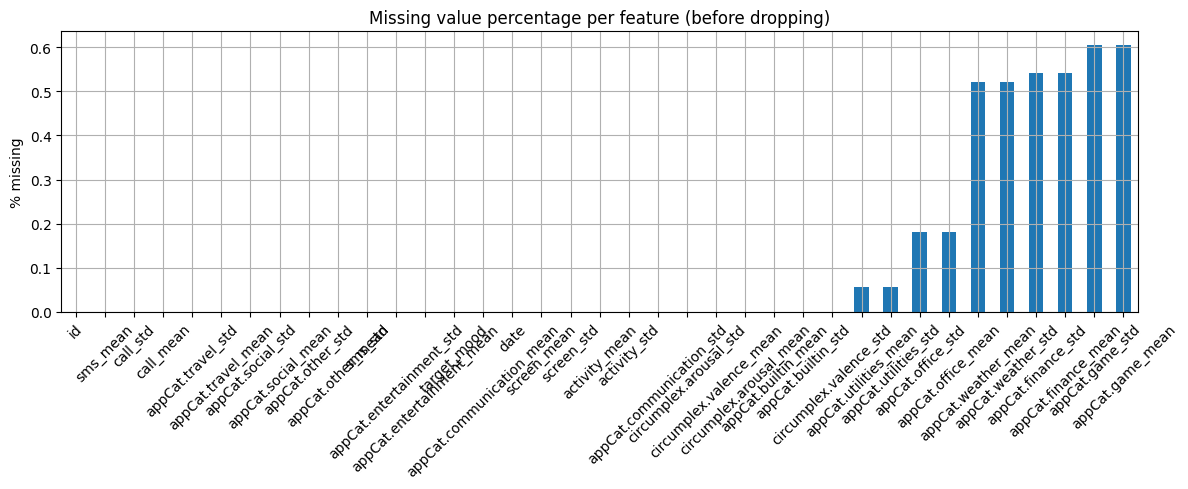

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
feature_df.isna().mean().sort_values().plot(kind='bar')
plt.title("Missing value percentage per feature (before dropping)")
plt.ylabel("% missing")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
nan_threshold = 0
to_drop = feature_df.columns[feature_df.isna().mean() > nan_threshold]
print("Dropped columns:", to_drop.tolist())

#all_nan_cols = feature_df.columns[feature_df.isna().all()]
#feature_df = feature_df.drop(columns=all_nan_cols)
#print("Dropped columns (100% NaN):", all_nan_cols.tolist())

Dropped columns: ['appCat.finance_mean', 'appCat.finance_std', 'appCat.game_mean', 'appCat.game_std', 'appCat.office_mean', 'appCat.office_std', 'appCat.utilities_mean', 'appCat.utilities_std', 'appCat.weather_mean', 'appCat.weather_std']


In [24]:
import re

appcat_cols_to_fill = [
    col for col in feature_df.columns
    if re.match(r'appCat\..*_(mean|std)$', col)
]

# Filling in NaN values with 0.0
feature_df[appcat_cols_to_fill] = feature_df[appcat_cols_to_fill].fillna(0.0)

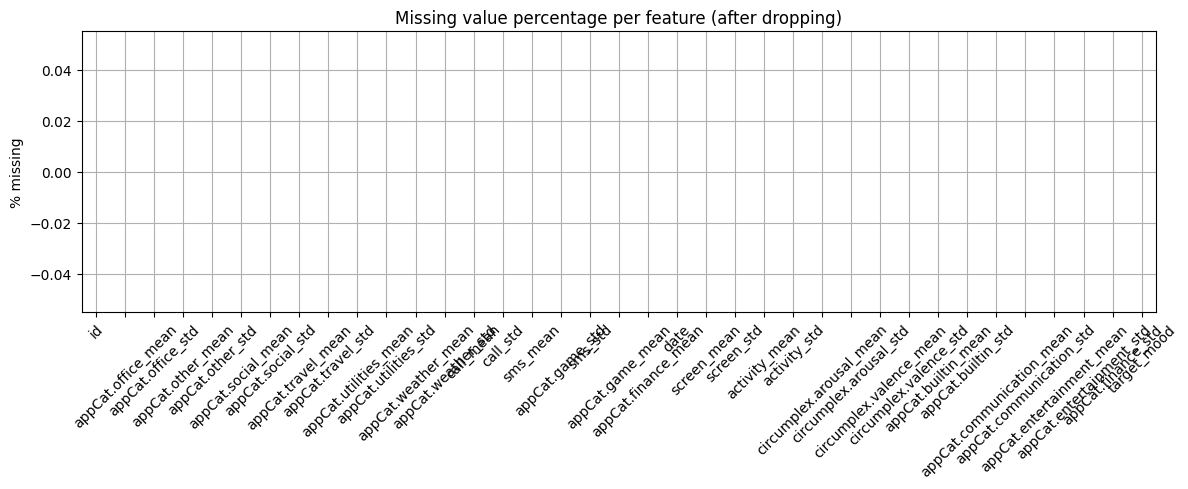

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
feature_df.isna().mean().sort_values().plot(kind='bar')
plt.title("Missing value percentage per feature (after dropping)")
plt.ylabel("% missing")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
feature_df.head()

,id,date,screen_mean,screen_std,activity_mean,activity_std,circumplex.arousal_mean,circumplex.arousal_std,circumplex.valence_mean,circumplex.valence_std,...,appCat.travel_std,appCat.utilities_mean,appCat.utilities_std,appCat.weather_mean,appCat.weather_std,call_mean,call_std,sms_mean,sms_std,target_mood
21,AS14.02,2014-02-22,21.988562,0.0,0.168068,0.0,0.0,0.0,0.0,0.0,...,0.0,4.477533,0.0,0.0,0.0,1.0,0.0,1.0,0.0,6.333333
22,AS14.02,2014-02-23,21.988562,0.0,0.168068,0.0,0.0,0.0,0.0,0.0,...,0.0,4.477533,0.0,0.0,0.0,1.0,0.0,1.0,0.0,6.333333
23,AS14.02,2014-02-24,21.988562,0.0,0.168068,0.0,0.0,0.0,0.0,0.0,...,0.0,4.477533,0.0,0.0,0.0,1.0,0.0,1.0,0.0,6.333333
24,AS14.02,2014-02-25,21.988562,0.0,0.168068,0.0,0.0,0.0,0.0,0.0,...,0.0,4.477533,0.0,0.0,0.0,1.0,0.0,1.0,0.0,6.333333
25,AS14.02,2014-02-26,21.988562,0.0,0.168068,0.0,0.0,0.0,0.0,0.0,...,0.0,4.477533,0.0,0.0,0.0,1.0,0.0,1.0,0.0,6.333333


## **Task 2A - Application of Classification Algorithms**

**Why did we select Random Forest and GRU?**

We selected Random Forest and General GRU as our main model for their interpretability, performance, and suitability for temporal and feature-rich data. While simpler models, like Naive Bayer offer faster predictions, it depends too highly on assumptions (like feature independence) that aren't true for our dataset. Decision trees are unstable and prone to overfitting, despite their interpretability. High-dimensional time-series data are difficult for k-NN to handle, and its scalability is limited. In contrast, neural networks such as GRU are highly effective at capturing sequential dependencies, which are essential for long-term mood prediction. Random Forest is a powerful classical baseline that enhances this by managing non-linear feature interactions and offering feature importance metrics.

**Advantages of Random Forest**
- Able to capture non-linear correlations between features (e.g. screen time vs. activity vs. mood).

- Outperforms individual trees in handling noisy, absent, and irrelevant features.

- Requires little preprocessing, since class imbalance is a smaller problem for RF compared to Decision Trees.

**Advantages of GRU**

- Perfect fit for daily time-series mood prediction, this system is designed for sequential data.

    - Can learn about temporal dependencies, such as time trends and lag effects.

- Powerful to analyse patterns between users. 

In [39]:
feature_df = pd.DataFrame(feature_rows)
feature_df = feature_df.drop(columns=[
    'call_mean', 'call_std', 'sms_mean', 'sms_std'
], errors='ignore')

base_cols = ['id', 'date', 'target_mood']
survived_features = [col for col in feature_df.columns if col not in base_cols and not col.startswith('mood_class')]
feature_df = feature_df[base_cols + survived_features].copy()

# Creating class labels for mood
def categorize_mood(mood):
    if mood < 6:
        return 0  # low
    elif mood <= 8:
        return 1  # normal
    else:
        return 2  # high

feature_df['mood_class'] = feature_df['target_mood'].apply(categorize_mood)

feature_df = feature_df.sort_values(by=['id', 'date'])
feature_df['mood_yesterday'] = (
    feature_df.groupby('id')['target_mood'].shift(1)
)

feature_df = feature_df.dropna(subset=['target_mood', 'mood_yesterday'])

print("Final instance-based dataset shape:", feature_df.shape)

Final instance-based dataset shape: (1288, 35)


In [40]:
import pandas as pd
import numpy as np

data = feature_df.copy()
X = data.drop(columns=['id', 'date', 'target_mood', 'mood_class'])
y = data['mood_class']

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

X_clean = preprocessor.fit_transform(X)

### **Random Forest (TimeSeries-Based Nested Cross-Validation + Grid Search)**

In [41]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import f1_score
import re
from sklearn.metrics import classification_report

appcat_cols = [col for col in data.columns if re.match(r'appCat\..*_(mean|std)$', col)]
data[appcat_cols] = data[appcat_cols].fillna(0.0)

X = data.drop(columns=['id', 'date', 'target_mood', 'mood_class'])
y = data['mood_class']

# Setting up Nested Cross Validation
outer_cv = TimeSeriesSplit(n_splits=5)
outer_scores = []

all_y_true = []
all_y_pred = []

for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X)):
    print(f"\n📂 Fold {fold+1}")

    X_train = X.iloc[train_idx].copy()
    X_test = X.iloc[test_idx].copy()
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]

    for col in X_train.columns:
        if col not in X_test.columns:
            X_test[col] = np.nan

    X_train = X_train.sort_index(axis=1)
    X_test = X_test[X_train.columns]

    valid_cols = X_train.columns[(X_train.notna().any()) & (X_test.notna().any())]
    X_train = X_train[valid_cols]
    X_test = X_test[valid_cols]

    print(f"✅ Using {len(valid_cols)} features")

    # Inner Cross-Validation loop for grid search
    inner_cv = TimeSeriesSplit(n_splits=3)
    pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier(random_state=42))
    ])

    param_grid = {
        'rf__n_estimators': [50, 100, 200, 300],              # More trees = more stability, but it can also increase overfitting
        'rf__max_depth': [5, 10, 20, None],                   # Exploration of deeper trees
        'rf__min_samples_split': [2, 5, 10],                  # Decision  when to split a node
        'rf__min_samples_leaf': [1, 2, 4],                    # To control overfitting
        'rf__max_features': ['sqrt', 'log2', None]           # Feature subsampling
    }

    grid = GridSearchCV(pipe, param_grid, cv=inner_cv, scoring='f1_weighted', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    preds = best_model.predict(X_test)
    score = f1_score(y_test, preds, average='weighted')
    outer_scores.append(score)

    all_y_true.extend(y_test)
    all_y_pred.extend(preds)

    print(f"🏆 Best Params: {grid.best_params_}")
    print(f"📈 F1 Score: {score:.4f}")

#print("\nClassification Report (across all outer CV folds):")
#print(classification_report(all_y_true, all_y_pred, digits=4))

print(f"\n🔥 Final Nested CV F1 Score: {np.mean(outer_scores):.4f}")


📂 Fold 1
✅ Using 31 features
🏆 Best Params: {'rf__max_depth': 5, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 50}
📈 F1 Score: 0.7817

📂 Fold 2
✅ Using 31 features
🏆 Best Params: {'rf__max_depth': 5, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 50}
📈 F1 Score: 0.7718

📂 Fold 3
✅ Using 31 features
🏆 Best Params: {'rf__max_depth': 10, 'rf__max_features': None, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
📈 F1 Score: 0.9790

📂 Fold 4
✅ Using 31 features
🏆 Best Params: {'rf__max_depth': 10, 'rf__max_features': None, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 10, 'rf__n_estimators': 200}
📈 F1 Score: 0.7531

📂 Fold 5
✅ Using 31 features
🏆 Best Params: {'rf__max_depth': 5, 'rf__max_features': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 50}
📈 F1 Score: 0.9305

🔥 Final Nested CV F1 Score: 0.8432


### **GRU (Gated Recurrent Unit)**

In [24]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

class GRUDataset(Dataset):
    def __init__(self, df, window_size=5):
        self.samples = []
        self.input_dim = None

        for uid in df['id'].unique():
            user_df = df[df['id'] == uid].sort_values('date')
            user_df = user_df.drop(columns=['target_mood'], errors='ignore')

            for i in range(window_size, len(user_df)):
                window = user_df.iloc[i - window_size:i]
                if window.isna().any().any():
                    continue
                x = window.drop(columns=['id', 'date', 'mood_class']).values
                y = user_df.iloc[i]['mood_class']
                if pd.isna(y):
                    continue
                x_tensor = torch.tensor(x, dtype=torch.float32)
                y_tensor = torch.tensor(int(y), dtype=torch.long)
                self.samples.append((x_tensor, y_tensor))

                if self.input_dim is None:
                    self.input_dim = x_tensor.shape[1]

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]

gru_dataset = GRUDataset(data)
train_size = int(0.8 * len(gru_dataset))
test_size = len(gru_dataset) - train_size

train_set, test_set = random_split(gru_dataset, [train_size, test_size])
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=32, num_layers=1, output_dim=3):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        _, h = self.gru(x)
        return self.fc(h[-1])

input_dim = gru_dataset.input_dim
model = GRUModel(input_dim=input_dim)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Creating training loop
for epoch in range(25):
    model.train()
    total_loss = 0
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        preds = model(x_batch)
        loss = criterion(preds, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"📉 Epoch {epoch+1}, Loss: {total_loss:.4f}")

model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for x_batch, y_batch in test_loader:
        preds = model(x_batch)
        predicted = torch.argmax(preds, dim=1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

print("\n🧾 Classification Report:")
print(classification_report(all_labels, all_preds))

📉 Epoch 1, Loss: 26.0271
📉 Epoch 2, Loss: 14.9045
📉 Epoch 3, Loss: 12.3077
📉 Epoch 4, Loss: 11.3799
📉 Epoch 5, Loss: 10.8592
📉 Epoch 6, Loss: 10.5524
📉 Epoch 7, Loss: 10.1797
📉 Epoch 8, Loss: 9.9559
📉 Epoch 9, Loss: 9.6557
📉 Epoch 10, Loss: 9.3686
📉 Epoch 11, Loss: 9.1444
📉 Epoch 12, Loss: 8.8713
📉 Epoch 13, Loss: 8.6417
📉 Epoch 14, Loss: 8.4426
📉 Epoch 15, Loss: 8.2363
📉 Epoch 16, Loss: 7.9765
📉 Epoch 17, Loss: 7.7465
📉 Epoch 18, Loss: 7.5216
📉 Epoch 19, Loss: 7.4147
📉 Epoch 20, Loss: 7.2325
📉 Epoch 21, Loss: 7.0729
📉 Epoch 22, Loss: 6.8892
📉 Epoch 23, Loss: 6.8541
📉 Epoch 24, Loss: 6.6489
📉 Epoch 25, Loss: 6.5365

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.56      0.62         9
           1       0.96      0.98      0.97       213
           2       0.57      0.44      0.50         9

    accuracy                           0.94       231
   macro avg       0.75      0.66      0.70       231
weighted avg       0.93  

In [25]:
from sklearn.feature_selection import mutual_info_classif

# Mutual info score for additional evaluation
mi_scores = mutual_info_classif(X_clean, y)
mi_df = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print("Top informative features:\n", mi_df.head(10))

Top informative features:
 mood_yesterday               0.229160
appCat.other_mean            0.208542
appCat.social_mean           0.204072
appCat.communication_mean    0.200572
appCat.entertainment_mean    0.198080
appCat.builtin_mean          0.194719
screen_mean                  0.192609
activity_mean                0.191184
appCat.utilities_mean        0.146982
circumplex.arousal_mean      0.142186
dtype: float64


## **Task 4 - Numerical Predictions**

### **Random Forest**

In [26]:
import numpy as np
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

appcat_cols = [col for col in data.columns if re.match(r'appCat\..*_(mean|std)$', col)]
data[appcat_cols] = data[appcat_cols].fillna(0.0)

X = data.drop(columns=['id', 'date', 'target_mood', 'mood_class'])
y = data['target_mood']

# Setting up Nested Cross-Valudation
outer_cv = TimeSeriesSplit(n_splits=5)
outer_mse_scores = []
outer_mae_scores = []

for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X)):
    print(f"\n📂 Fold {fold+1}")

    X_train = X.iloc[train_idx].copy()
    X_test = X.iloc[test_idx].copy()
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]

    for col in X_train.columns:
        if col not in X_test.columns:
            X_test[col] = np.nan

    X_train = X_train.sort_index(axis=1)
    X_test = X_test[X_train.columns]

    valid_cols = X_train.columns[(X_train.notna().any()) & (X_test.notna().any())]
    X_train = X_train[valid_cols]
    X_test = X_test[valid_cols]

    print(f"✅ Using {len(valid_cols)} features")

    # Inner grid-search for Cross-validation
    inner_cv = TimeSeriesSplit(n_splits=3)
    pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('regressor', RandomForestRegressor(random_state=42))
    ])

    param_grid = {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__max_depth': [5, 10, 15, None],
        'regressor__min_samples_split': [2, 5, 10],
        'regressor__max_features': ['sqrt', 'log2', None]
    }

    grid = GridSearchCV(pipe, param_grid, cv=inner_cv, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    preds = best_model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)

    outer_mse_scores.append(mse)
    outer_mae_scores.append(mae)

    print(f"🏆 Best Params: {grid.best_params_}")
    print(f"📈 MSE: {mse:.4f}, MAE: {mae:.4f}")

print("\n🔥 Final Random Forest Regressor Results:")
print(f"Average MSE: {np.mean(outer_mse_scores):.4f}")
print(f"Average MAE: {np.mean(outer_mae_scores):.4f}")


📂 Fold 1
✅ Using 31 features
🏆 Best Params: {'regressor__max_depth': 5, 'regressor__max_features': 'log2', 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
📈 MSE: 0.5635, MAE: 0.5451

📂 Fold 2
✅ Using 31 features
🏆 Best Params: {'regressor__max_depth': 15, 'regressor__max_features': 'sqrt', 'regressor__min_samples_split': 5, 'regressor__n_estimators': 100}
📈 MSE: 0.7304, MAE: 0.6271

📂 Fold 3
✅ Using 31 features
🏆 Best Params: {'regressor__max_depth': 10, 'regressor__max_features': 'sqrt', 'regressor__min_samples_split': 10, 'regressor__n_estimators': 300}
📈 MSE: 0.3831, MAE: 0.5078

📂 Fold 4
✅ Using 31 features
🏆 Best Params: {'regressor__max_depth': 5, 'regressor__max_features': None, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}
📈 MSE: 0.3550, MAE: 0.4634

📂 Fold 5
✅ Using 31 features
🏆 Best Params: {'regressor__max_depth': 5, 'regressor__max_features': None, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 300}
📈 MSE: 0.1884, M

### **GRU (Gated Recurrent Unit)**

In [27]:
class GRURegressorDataset(Dataset):
    def __init__(self, df, window_size=5):
        self.samples = []

        for uid in df['id'].unique():
            user_df = df[df['id'] == uid].sort_values('date')

            for i in range(window_size, len(user_df)):
                window = user_df.iloc[i - window_size:i]
                if window.isna().any().any():
                    continue
                x = window.drop(columns=['id', 'date', 'target_mood', 'mood_class']).values
                y = user_df.iloc[i]['target_mood']
                if pd.isna(y):
                    continue
                self.samples.append((torch.tensor(x, dtype=torch.float32),
                                     torch.tensor(y, dtype=torch.float32)))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]

gru_reg_dataset = GRURegressorDataset(data)
train_size = int(0.8 * len(gru_reg_dataset))
test_size = len(gru_reg_dataset) - train_size

train_set, test_set = random_split(gru_reg_dataset, [train_size, test_size])
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)


In [28]:
class GRURegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim=32, num_layers=1):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        _, h = self.gru(x)
        return self.fc(h[-1]).squeeze()


In [29]:
model = GRURegressor(input_dim=input_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

for epoch in range(25):
    model.train()
    epoch_loss = 0
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        preds = model(x_batch)
        loss = criterion(preds, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"📉 Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for x_batch, y_batch in test_loader:
        preds = model(x_batch)
        all_preds.extend(preds.numpy())
        all_labels.extend(y_batch.numpy())

mse = mean_squared_error(all_labels, all_preds)
mae = mean_absolute_error(all_labels, all_preds)

print(f"\n📊 GRU Regressor Results — MSE: {mse:.4f}, MAE: {mae:.4f}")


📉 Epoch 1, Loss: 1069.8893
📉 Epoch 2, Loss: 708.9031
📉 Epoch 3, Loss: 404.2324
📉 Epoch 4, Loss: 199.5823
📉 Epoch 5, Loss: 93.9044
📉 Epoch 6, Loss: 51.2820
📉 Epoch 7, Loss: 33.4392
📉 Epoch 8, Loss: 26.4013
📉 Epoch 9, Loss: 24.2358
📉 Epoch 10, Loss: 23.4423
📉 Epoch 11, Loss: 23.1731
📉 Epoch 12, Loss: 22.8524
📉 Epoch 13, Loss: 22.5145
📉 Epoch 14, Loss: 22.2409
📉 Epoch 15, Loss: 21.7487
📉 Epoch 16, Loss: 21.4902
📉 Epoch 17, Loss: 21.0025
📉 Epoch 18, Loss: 20.8664
📉 Epoch 19, Loss: 20.3428
📉 Epoch 20, Loss: 19.6841
📉 Epoch 21, Loss: 19.1802
📉 Epoch 22, Loss: 18.9375
📉 Epoch 23, Loss: 18.7232
📉 Epoch 24, Loss: 18.5461
📉 Epoch 25, Loss: 18.3682

📊 GRU Regressor Results — MSE: 0.7884, MAE: 0.6393
